In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.puot import PUOT
from src.algo import solve, round_plan
from demo import gen_gaussian, gen_fragmented_hypercube
from visualize import visualize_2D_plan, visualize_3D_plan

# Random seed
SEED = 3698

In [2]:
# Dimensions
n = 50
m = 100
d = 2

In [3]:
# Generate synthetic data
datatype = 'Gaussian'
if datatype == 'Gaussian':
    k_star = 2
    X, Y = gen_gaussian(n, m, d, k_star, seed=SEED)
elif datatype == 'Hypercube':
    k_star = 2
    X, Y = gen_fragmented_hypercube(n, m, d, k_star, seed=SEED)

In [4]:
np.random.seed(SEED)

# Generate marginals
alpha = 1.0
beta = 1.0

a = np.random.rand(n)
b = np.random.rand(m)

a = a / a.sum() * alpha
b = b / b.sum() * beta

In [5]:
# Regularization parameters
tau = np.float64(5.0)

# Dimension of subspace
k = 10

# Original PUOT
puot = PUOT(X, Y, a, b, tau, k)

In [6]:
# Original UOT
uot = puot.original()
pi_star = uot.optimize_f()
f_star = uot.calc_f(pi_star)

/home/vltanh/miniconda3/envs/ot/lib/python3.9/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


2.915256991787104


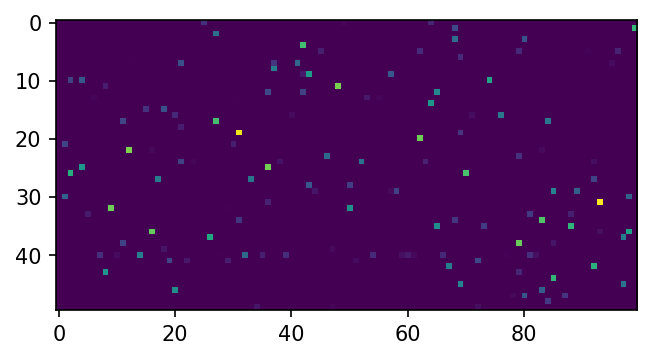

In [7]:
print(f_star)
fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi_star)
plt.show()

In [8]:
# Entropic UOT
eta = 10.0
euot = uot.entropic_regularize(eta)
u_hat, v_hat = euot.optimize_h()
pi_hat = euot.calc_pi(u_hat, v_hat)
f_hat = euot.calc_f(pi_hat)

4.669190788012731


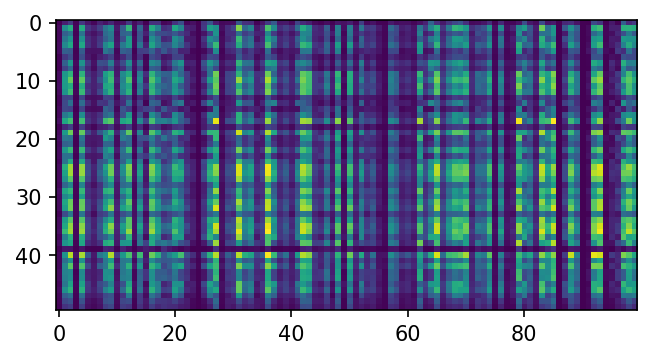

In [9]:
print(f_hat)
fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi_hat)
plt.show()

In [10]:
# Entropic regularized PUOT
eta = 10.0
epuot = puot.entropic_regularize(eta)

In [11]:
# Initial u and v
u0, v0 = np.random.randn(n), np.random.randn(m)

# Initial U
U0, _ = np.linalg.qr(np.random.randn(d, k))

# Step size
delta = np.float64(0.001)

# Accuracy threshold
eps_1 = np.float64(0.000001)
eps_2 = np.float64(0.0001)

# Run algorithm
log = solve(epuot,
            u0, v0,
            U0,
            delta,
            eps_1, eps_2,
            save_uv=True, save_U=True)

In [12]:
u, v = log['u'][-1], log['v'][-1]
U = log['U'][-1]

C = epuot.calc_proj_cost(U)
pi = epuot.calc_pi(u, v, C)

f = log['f'][-1]

10.513680274263555


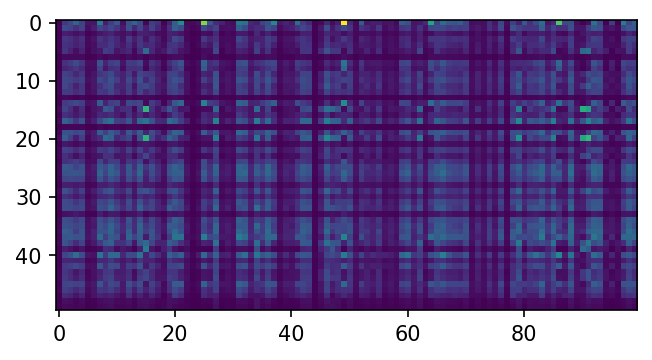

In [13]:
print(uot.calc_f(pi))
fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi)
plt.show()

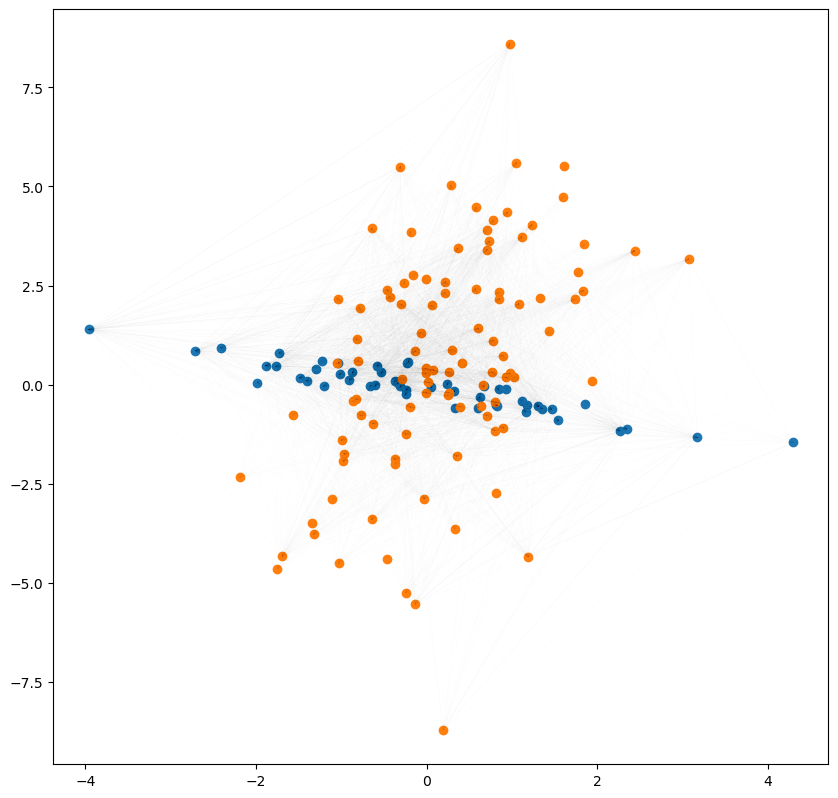

In [14]:
visualize_2D_plan(X, Y, U, pi)

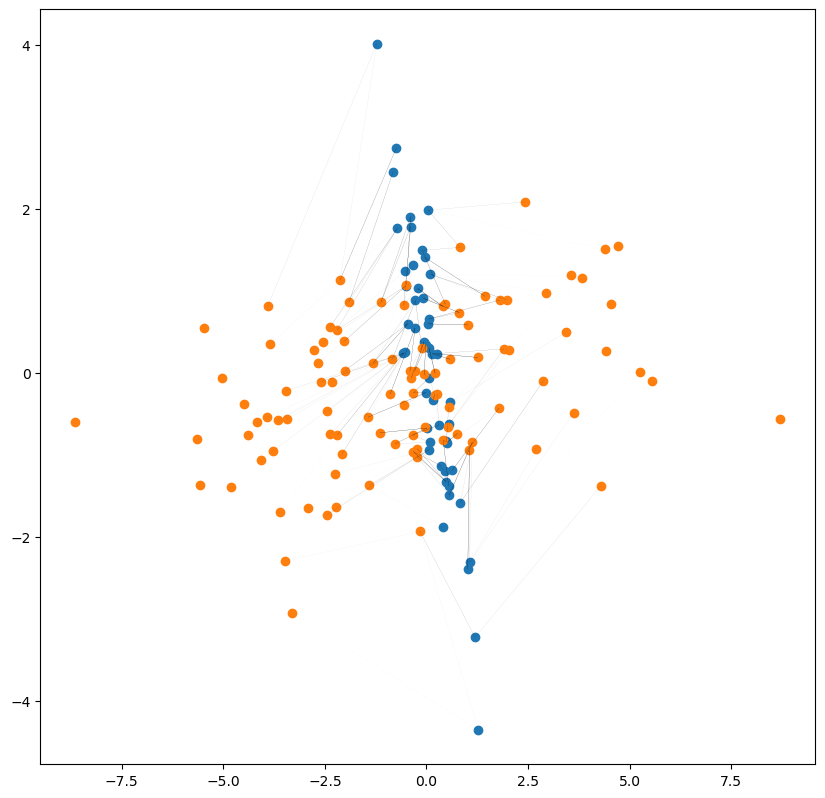

In [15]:
visualize_2D_plan(X, Y, np.eye(2), pi_star)

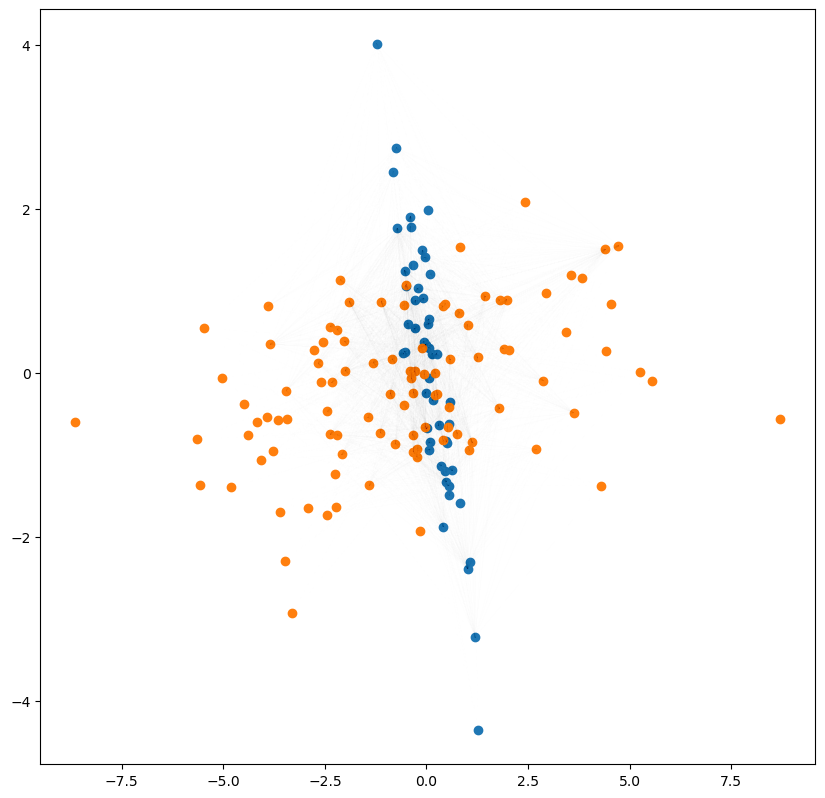

In [16]:
visualize_2D_plan(X, Y, np.eye(2), pi_hat)